<div class="alert alert-block alert-warning"><div>
    
   **"YELLOW" COLOR BLOCK RELATES TO BUSINESS RESPECTIVE PEOPLE**

<div class="alert alert-block alert-info"><div>
    
 **"BLUE" COLOR BLOCK RELATES TO DATA SCIENTIST**

<div class="alert alert-block alert-info"><div>

# 1. Program Motivation
<br>

Help Mariott predict a customer's behaviour regarding their booking cancellations. <br>

### In other words, Mariott want's to determine who will or who will not cancel their bookings.

## Background Information

Hotel industry suffer's a lot due to last minute cancellations. By tracking customer's behaviour through their past transactions, we can determine an accurate model that can help us overcome the loss incurred due to last minute booking cancellations.
<br>

Now the question we must ask ourselves.... <br>

## what factors lead to booking cancellation?

>- Number of nights booked variety
>- Previous cancellation
>- Changes in bookings 
>- Average Daily Rate of the room booked
>- Entertaining special requests

In this model, we will be using a couple of different features for our model.<br>

## Check out this beautiful picture of a vineyard

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Starwoodhotels_in_Huzhou.jpg">


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

# 2. Aggregate Data

<div class="alert alert-block alert-warning"><div>

>**Problem statements:**
>- Get data from various sources, various stake holders and aggregate it for the model
>- Identify the important features from the aggregated dataset

In this case we are reading a csv dataset and the schema will be inferred from the values.<br>
<b>'is_canceled'</b> is our prediction variable.<br>
Rest of the variables are features or dependent variable.<br>

<br>

In [38]:
######################################
# Importing source dataset using read_csv function from pandas
# Default delimiter will be ',' and schema will be inferred from the data since no other paramets are provided
######################################

df = pd.read_csv('hotel_bookings.csv')
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2


# 2.1 DATA PREP

<div class="alert alert-block alert-warning"><div>
    
- [x] Initial Evaluation
- [x] Check number of records
- [x] Drop Duplicates
- [x] Treat NA values
- [x] Rename Column Name 
- [x] Datatype correction (Define numerical value)
- [x] Treat Outliers 
- [x] Feature selection
 - [x] Multi-collinearity remove 
 - [x] Select categorical variables 
 - [x] Encode categorical variables 
- [x] Slope shifter & Intercept shifter 

##### Inital Evaluations

In [39]:
len(df.index)

119390

<div class="alert alert-block alert-warning"><div>
    
>**Observations:**<br>
>>**119390 Records**<br><br>
>>**Target:** : **is_cancelled**<br><br>
>> Other possibiities for prediction:
>>>- We can also determine how long would the stay will be if booked. We might dig into this, this variable can be called "STAY LENGTH".
>>>- We can also predict what kind of room is favourable to a particular class of customer. This variable can also be called "ROOM BOOKED"
<br><br>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<div class="alert alert-block alert-warning"><div>

**Key Takeaways:**
- **Target Variable : is_cancelled**
- We have 10 **categorical** variables. (Variables that are object)
- We have 20 **numerical** variables. (Variables that are either float or int)

<div class="alert alert-block alert-info"><div>

**Defining columns**

- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date 

- arrival_date_year, arrival_date_month, arrival_date_day_of_month will be clubbed into one variable as "date_of_arrival" : Not sure if it will be beneficial

- booking_changes: Number of times bookings has been changed.

- deposit_type: This variable is expected to be useful while predicting target variable.

- days_in_waiting_list: This also seems a really useful for predicting cancellations. 

- cusotmer_type: A useful feature because, for example if there has been a group booking it must be really difficult to be cancelled. Thus, it is needed.

- ADR: Rates of staying at hotel are definitely important while predicting cancellations because what if the ADR is too high and the customer has the option to get refund and if they stumble over another promotion that provides them a good deal then obviously they will cancel the more expensive one.

- total_of_special_requests: If there are high number of special requests then it should definitely have some reaction for target variable, let's see.

<div class="alert alert-block alert-warning"><div>
    
**Missing values**

- 1) Country
- 2) Agent
- 3) Company

<div class="alert alert-block alert-warning"><div>

>**Target:** : **'is_cancelled'**<br><br>
> Other possibiities for prediction:
>>- We can also determine how long would the stay will be if booked. We might dig into this, this variable can be called "STAY LENGTH".
>>- We can also predict what kind of room is favourable to a particular class of customer. This variable can also be called "ROOM BOOKED"

<br><br>

In [42]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<div class="alert alert-block alert-info"><div>


#### High Level Outlier Detection Observations:

- Looking at lead_time, there should be a discrepancy because the max value is 732 days which is absurd because why would anyone book more than 2 years in advance.

- Maximum value of adults is justified, because they are travelling in group.

- Previous_cancellations can be also categorized in (0-5), (5-10), (10+)

- Agent, company columns can be dropped because of missing values.

- ADR needs to be inspected in a more detailed manner.

<div class="alert alert-block alert-warning"><div>

**Key Takeaways : Understanding**

1) Since, mean value of 'is_canceled' is less than 0.5 it means we have datapoints for not cancelled bookings.

2) Mean and STD of 'lead_time' are almost same therefore it shows it is normally distributed.

3) 'is_repeated_guest' has mean less than 0.1 thus definitely we have majority of datapoints that have not repeated their stays.

4) 'company''s majority value are missing so we will drop the column. 


<div class="alert alert-block alert-warning"><div>

**Key Takeaways : Assumptions**

1) 'children' & 'babies' have only maximum values => it might have less correlation with target variable.

2) 'previous_cancellations' has mostly max values, it is expected to have less correlation with respect to target variable.

3) 'previous_bookings_not_canceled' again only have max values, expectedly it might also have less impact on target variable.

4) 'days_in_waiting_list' is anticipated to be highly impactful, for example if the booking is supposed to have high numbe of days in waiting list then it is likely to have more chances of getting cancelled.

5) Agent has some missing values, we will see later how we are treating this column.

6) 'required_car_parking' should have a low impact on "is_cancelled" in both ways, intuitionally and based upon data.

7) 'total_of_special_requests' might be useful when determining target variable because most likely if they have lots of request, they might not cancel.


##### Drop Duplicates

In [43]:
#Remove any duplicates
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

df.isnull().sum() #Used to find out the number of null / missing values in each column of the data

Number of records: 119390
Number of records after dropping dupes: 119390


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Explorartory Data Analysis
<div class="alert alert-block alert-info"><div>

Now we will see how data relates with our assumptions.


**Univariate Analysis**

In [44]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))

Percentage cancelation=  0.37041628277075134


<div class="alert alert-block alert-warning"><div>
    
We had earlier inferred that we have more datapoints regarding booking "CANCELLED", and statistically we have only 37% data regarding "CANCELLED" booking.   

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=numerics)

pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  missing_vals = df_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
is_canceled,0.37,0.00,0.48,0.00,1.0,0
lead_time,104.01,69.00,106.86,0.00,737.0,0
arrival_date_year,2016.16,2016.00,0.71,2015.00,2017.0,0
arrival_date_week_number,27.17,28.00,13.61,1.00,53.0,0
arrival_date_day_of_month,15.80,16.00,8.78,1.00,31.0,0
stays_in_weekend_nights,0.93,1.00,1.00,0.00,19.0,0
stays_in_week_nights,2.50,2.00,1.91,0.00,50.0,0
adults,1.86,2.00,0.58,0.00,55.0,0
children,0.10,0.00,0.40,0.00,10.0,4
babies,0.01,0.00,0.10,0.00,10.0,0


<AxesSubplot:xlabel='is_canceled', ylabel='Count'>

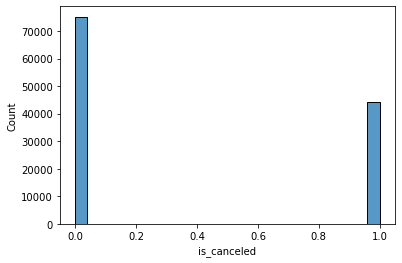

In [46]:
sns.histplot(df_temp['is_canceled'])

- As we can observe that we have not outliers for this data.

In [47]:
df.select_dtypes(include=numerics).corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<div class="alert alert-block alert-warning"><div>

**Observation**

- Not many features are highly correlated with the target variable.<br><br>

- Relatively highly correlated variables are:<br>
    - Positively:
        - lead_time
        - previous_cancellations<br><br>
        
    - Negatively:
        - booking_changes
        - required_car_parking_spaces (Surprisingly)
        - total_of_special_requests	(Unexpectedly)

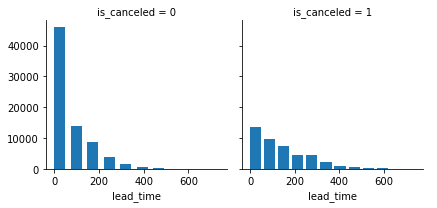

In [48]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

<div class="alert alert-block alert-warning"><div>

**Observation:**

- First we have to remove the the outliers that have waiting_time more than 600 days which were not cancelled. 

- Moreover, lead_time is perfectly divided wtih long catplot so we can leave it same.

<AxesSubplot:xlabel='previous_cancellations', ylabel='count'>

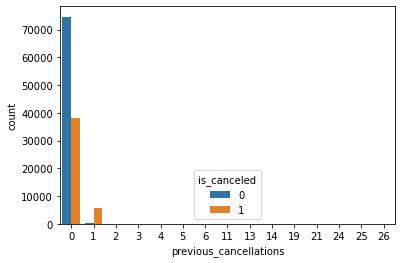

In [49]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

<div class="alert alert-block alert-warning"><div>

- As can see in the graph, customers who haven't cancelled previously will most likely not cancel again. Thus, correlation comprehends with the logic. 

<AxesSubplot:xlabel='booking_changes', ylabel='is_canceled'>

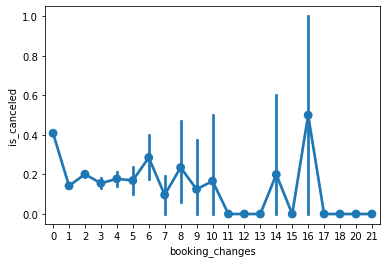

In [50]:
sns.pointplot(data=df, x='booking_changes', y='is_canceled')

<div class="alert alert-block alert-warning"><div>

- As we can see in the graph the more number of booking changes has led to less number of booking cancellation. 

**Multivariate Analysis**

In [51]:
df.pivot_table(columns='hotel', values='total_of_special_requests', aggfunc=lambda x:x.sum())


hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


<div class="alert alert-block alert-warning"><div>

There is very little difference BUT if there are special requests then it is MOST likely the booking will not be cancelled. 

Now to think in more detail, if there are special request then there is a chance that the hotel booking might be for some special occasion, mostly if occassion is there it is unlikely the plans are cancelled. 

In [52]:
year_count = df.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


<div class="alert alert-block alert-warning"><div>

This data can help us understand which year was best for tourism. We can infer that it is a trend, all three years have the same amount of percentage divide. 

The range of cancellations is maximum in months April and June but rest of the months do not have much difference, so we can not infer much from the given data.

<div class="alert alert-block alert-info"><div>

**Variable Encoding**

- First we need to convert text data and make it numerical. Such as months.
- After converting month we need to combine them and make a date.
- We can also see if the room is being changed then it can mean that booking is cancelled. There might be a possibility if room has cbeen changed then a new booking was placed. Or what if assigned room was not upto standard which led to cancellation? There are quite many responsibilities.
- Initially, I thought we can drop the column babies because they are never charged but now we have a better way, to count babies as children and add them, thus going to implement that code.

In [53]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [54]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

df['arrival_date']

0          2015-7-1
1          2015-7-1
2          2015-7-1
3          2015-7-1
4          2015-7-1
            ...    
119385    2017-8-30
119386    2017-8-31
119387    2017-8-31
119388    2017-8-31
119389    2017-8-29
Name: arrival_date, Length: 119390, dtype: object

In [55]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [56]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [57]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']


In [58]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [59]:
df['agent'].fillna(df['agent'].mode()[0], inplace=True)

In [60]:
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [61]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [62]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [63]:
df.drop(['arrival_date_month','meal', 'assigned_room_type','arrival_date','reserved_room_type'], axis=1, inplace=True)

# 3 MODEL AND RESULT

<div class="alert alert-block alert-info"><div>


Defining following values:

- FN : False Negative : Bookings that were predicted to be not canceled but in reality were cancelled. 

- TN : True Negative : Bookings that were predicted to be not canceled but in reality were also cancelled.

- FP : False Positive : Bookings that were predicted to be canceled but in reality were not canceled.

- TP : True Positive : Bookings that were predicted to be booked and in reality were also booked. 

In layman terms - We aim for high accuracy that means also true values shoud be more! 

F1 score is perfect - harmonic mean between precision and recall.

In [64]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 48), (95512,), (23878, 48), (23878,))

<div class="alert alert-block alert-warning"><div>

- Since we have such a big dataset we will be splitting dataset for 80/20. 

In [65]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [82]:
#Baseline model 

is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))


Percentage cancelation=  0.37041628277075134


<div class="alert alert-block alert-warning"><div>

- Our baseline model dictates that we need accuracy more than 37% which sets a really low bar. 

Recommend : Accumulate more data points based on business requirement that is booking's being cancelled! 

In [66]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))


Average cross validation score: 0.806
Test accuracy: 0.810
F1 score: 0.712
[[13726  1369]
 [ 3167  5616]]


<div class="alert alert-block alert-warning"><div>


- Since we are trying to predict categorical variables, logistic regression is a good bet.

- As we can see, TN and TP our quite high, and TN are higher than TP as expected. Because, is_canceled negative values are higher, we have more data on bookings that were not cancelled. 

- As we can see, there can be no over-fitting due to cross-validation the test accuracy score is almost same as test score so this gurantees that our model will work in new-coming data.


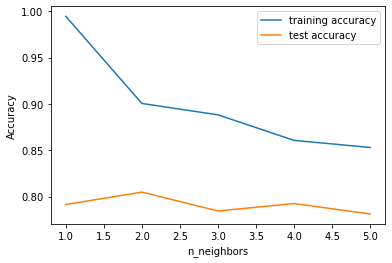

In [67]:
#KNN
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

<div class="alert alert-block alert-warning"><div>

- As we can see, there is a sharp turn for n = 2 neighbours, we will take 2 neighbours to classify our datapoints if they were cancelled or not. 

In [77]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.796
Test accuracy: 0.805
F1 score: 0.692
[[13972  1123]
 [ 3538  5245]]


<div class="alert alert-block alert-warning"><div>


- kNN has more TN values thus it can predict more accurately the bookings that were not canceled as compared to logistic regression.

- For now, I will rank kNN > Logistic Regression though, F1 score is less of kNN as compared to logistic regression. 

In [69]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.749
Test accuracy: 0.755
F1 score: 0.501
[[15073    22]
 [ 5840  2943]]


<div class="alert alert-block alert-warning"><div>

- Since, decision tree has not performed upto the mark - very high FN values, even though we have more data points on bookings that were NOT cancelled, it should have predicted more accurately regarding bookings that were NOT cancelled. We need a forest.  

In [78]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [80]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.7730127651184304
Test score: 0.782
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.7772426832057723
Test score: 0.789


<div class="alert alert-block alert-warning"><div>

- Forest did not help, it did improve the accuracy but not enough. 
- We have limited our depth search till 1,2,5 and the best accuracy is obtained at level 5. 

In [72]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 0.877
Test accuracy: 0.864
F1 score: 0.813
[[13595  1500]
 [ 1743  7040]]


/Users/mcdaddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<div class="alert alert-block alert-warning"><div>
    
- As expected, Neural Net outperformed on all algorithms. With high train and test accuracy we also have high F1 score, which gurantees our selection of Neural Net as the best model.

- It is predicting TN and TP values accurately more than any other model, therefore it is the **Winner** model for predicting "is_canceled". 

# 4 Recommendations

<div class="alert alert-block alert-info"><div>

As recommended earlier:

1) These datapoints can also be used to recommend stay_duration and what kind of room is preferred by what kind of room should be assigned. 

2) These datapoints can also be used to track a customer's preferred travel time.

3) Business should use this as baseline for predicting their profitability and assign this as hotel's earning based on customer's cancellation predictability.

4) They can also prioritize their loyal customers who has less cancellation predictability and assign them with better rooms and create a reward system.

5) Business can use this as promotional tool and promote their hotels even at more expensive price when their cancellation predictability is high. 